# This notebook will attempt to build a neural network for image classification using the MNIST dataframe found on Kaggle. The notebook will not use any Neural network libraries such as Tensorflow, Keras, Pytorch etc.. in order to give a deeper level of understanding of what a neural network does.

### The following links helped my understanding of how to build this:

Building the network:
* https://www.youtube.com/watch?v=w8yWXqWQYmU

Intuition behind neural networks:
* https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

* https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2

* https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3

* https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4

In [198]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [199]:
data = pd.read_csv('data/train.csv')

### The cell below will split the data into training and testing sets 

In [200]:
data = np.array(data)
m , n = data.shape
np.random.shuffle(data)

# Splitting dataframe into testing set
test_data = data[0:1000].T
test_X = test_data[1:n]
test_X = test_X / 255.
test_y = test_data[0]

# Splitting dataframe into training set
train_data = data[1000:m].T
train_X = train_data[1:n]
train_X = train_X / 255.

train_y = train_data[0]
_,m_train = train_X.shape

### The following cell is concerned with inititalising weights and biases

In [201]:
def initialise_params():
    # Initialising first weight matrix to have 10 rows and 784 columns,
    # np.random.rand will give number between 0 and 1 and so -0.5 will 
    # give values between -0.5 and 0.5
    w1 = np.random.rand(10,784) - 0.5
    
    # Initialising first bias vector, will have values between -0.5 and 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    w2 = np.random.rand(10,10) - 0.5
    
    b2 = np.random.rand(10,1) - 0.5
    
    return w1, b1, w2, b2

### The following cells will define the activation functions, forward propagation, back propagation, parameter updating, gradient descent algorithms and other necessary functions

In [202]:
def relu(z):
    return np.maximum(z,0)

def derivative_relu(z):
    return z > 0

In [203]:
def softmax(z):
    a = np.exp(z) / sum(np.exp(z))
    return a

In [204]:
def one_hot_encoder(y):
    one_hot_y = np.zeros((y.size, y.max()+1))
    one_hot_y[np.arange(y.size),y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [205]:
def forward_propagation(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    
    return z1, a1, z2, a2

In [206]:
def back_propagation(z1, a1, z2, a2, w1, w2, x, y):
    
    one_hot_y = one_hot_encoder(y)
    
    dz2 = a2 - one_hot_y
    
    dw2 = 1/m * dz2.dot(a1.T)
    
    db2 = 1/m * np.sum(dz2)
    
    dz1 = w2.T.dot(dz2) * derivative_relu(z1)
    
    dw1 = 1/m * dz1.dot(x.T)
    
    db1 = 1/m * np.sum(dz1)
    
    return dw1, db1, dw2, db2

In [207]:
def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    
    return w1, b1, w2, b2

In [208]:
def get_predictions(a2):
    return np.argmax(a2, 0)

In [209]:
def get_accuracy(predictions, y):
    print(predictions,y)
    return np.sum(predictions == y) / y.size

In [210]:
def gradient_descent(x,y, alpha, iterations):
    w1, b1, w2, b2 = initialise_params()
    
    for i in range(iterations):
        z1, a1, z2, a2 = forward_propagation(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_propagation(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print('Iteration:', i)
            print('Accuracy', get_accuracy(get_predictions(a2), y))
    
    return w1, b1, w2, b2

In [211]:
w1, b1, w2, b2 = gradient_descent(train_X, train_y, 0.2, 1000)

Iteration: 0
[5 3 3 ... 5 9 5] [3 9 5 ... 7 8 4]
Accuracy 0.11470731707317074
Iteration: 50
[3 9 7 ... 7 8 9] [3 9 5 ... 7 8 4]
Accuracy 0.662609756097561
Iteration: 100
[3 9 7 ... 7 8 9] [3 9 5 ... 7 8 4]
Accuracy 0.7641707317073171
Iteration: 150
[3 9 7 ... 7 8 9] [3 9 5 ... 7 8 4]
Accuracy 0.8052682926829269
Iteration: 200
[3 9 7 ... 7 8 9] [3 9 5 ... 7 8 4]
Accuracy 0.8201951219512195
Iteration: 250
[3 9 5 ... 7 8 9] [3 9 5 ... 7 8 4]
Accuracy 0.8384146341463414
Iteration: 300
[3 9 5 ... 7 8 4] [3 9 5 ... 7 8 4]
Accuracy 0.851170731707317
Iteration: 350
[3 9 5 ... 7 8 4] [3 9 5 ... 7 8 4]
Accuracy 0.8610487804878049
Iteration: 400
[3 9 5 ... 7 8 4] [3 9 5 ... 7 8 4]
Accuracy 0.8685121951219512
Iteration: 450
[3 9 5 ... 7 8 4] [3 9 5 ... 7 8 4]
Accuracy 0.8742926829268293
Iteration: 500
[3 9 5 ... 7 8 4] [3 9 5 ... 7 8 4]
Accuracy 0.8791219512195122
Iteration: 550
[3 9 5 ... 7 8 4] [3 9 5 ... 7 8 4]
Accuracy 0.8827560975609756
Iteration: 600
[3 9 5 ... 7 8 4] [3 9 5 ... 7 8 4]
Accur

In [212]:
def make_prediction(x, w1, b1, w2, b2):
    _,_,_,a2 = forward_propagation(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

In [213]:
def test_predictions(index, w1, b1, w2, b2):
    current_image = train_X[:,index, None]
    prediction = make_prediction(train_X[:, index, None], w1, b1, w2, b2)
    label = train_y[index]
    print('Prediction: ', prediction)
    print('Label: ', label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction:  [3]
Label:  3


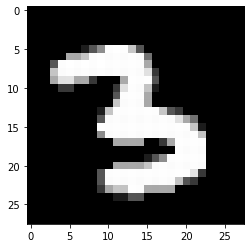

Prediction:  [0]
Label:  0


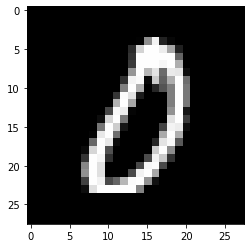

Prediction:  [4]
Label:  4


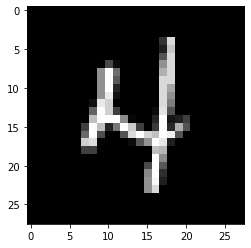

Prediction:  [5]
Label:  3


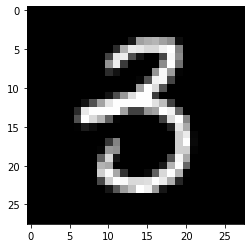

Prediction:  [4]
Label:  4


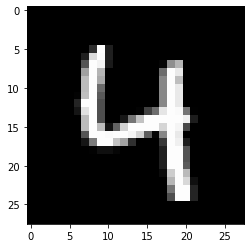

In [214]:
test_predictions(100,w1,b1,w2,b2)
test_predictions(246,w1,b1,w2,b2)
test_predictions(14,w1,b1,w2,b2)
test_predictions(79,w1,b1,w2,b2)
test_predictions(69,w1,b1,w2,b2)

In [215]:
test_predictions = make_prediction(test_X, w1, b1, w2, b2)

In [216]:
get_accuracy(test_predictions,test_y)

[7 3 2 7 8 7 0 6 8 3 8 4 2 3 7 7 9 0 0 0 6 6 0 1 9 9 1 8 1 7 0 3 8 4 9 6 3
 7 7 0 2 4 9 6 4 1 2 1 7 0 9 7 6 5 1 1 7 0 1 1 3 8 1 1 1 9 4 0 5 5 4 6 7 0
 7 8 3 5 8 4 6 6 0 0 7 8 3 6 4 4 3 4 5 2 7 3 9 1 4 6 4 8 4 8 0 3 7 0 7 5 6
 6 8 8 4 7 2 2 5 2 3 6 6 9 7 2 1 3 9 9 7 0 3 8 6 8 3 3 2 8 0 6 3 0 8 9 6 0
 2 6 4 2 5 3 2 1 8 1 5 2 8 2 3 5 0 1 1 1 0 1 0 8 3 0 8 0 0 7 9 3 6 3 8 4 3
 5 8 8 3 6 0 3 5 6 7 8 9 2 1 7 6 1 5 9 2 7 8 8 1 6 8 2 9 8 5 2 3 3 6 6 1 9
 6 9 7 0 1 1 5 4 8 6 1 9 2 3 0 4 0 0 7 5 4 1 2 6 4 9 0 5 0 8 6 9 3 4 3 6 0
 9 6 0 3 4 2 1 4 9 9 4 8 4 5 9 9 7 7 1 1 9 1 2 3 7 3 9 6 6 2 4 6 0 9 1 6 7
 9 9 7 4 8 3 2 7 5 2 9 4 1 5 9 4 8 8 9 3 6 8 8 0 8 4 2 1 9 7 0 3 3 4 7 8 4
 4 7 0 6 7 9 4 8 8 2 7 5 2 8 5 5 1 9 6 7 4 8 9 6 5 7 8 1 6 6 0 5 1 9 4 8 0
 8 4 1 3 6 7 6 1 4 7 3 3 2 6 2 2 2 1 5 8 3 6 4 7 4 9 1 5 0 5 3 3 1 5 6 1 1
 7 0 6 8 6 9 9 4 3 2 4 7 9 2 5 0 0 7 0 8 1 9 4 0 1 8 2 8 4 3 1 8 8 2 2 7 2
 8 1 4 0 4 5 9 7 8 5 3 2 8 5 7 8 1 8 1 9 9 3 6 1 2 4 1 4 4 2 1 6 2 7 0 6 5
 7 7 2 4 3 7 4 0 9 9 7 4 

0.898

### Model holds > 89% accuracy for testing set and so was not overfitted and generalises well.